## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

## Chapter-011-13-Pulleys-04

In [2]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

import math
import numpy as np
from matplotlib import pyplot as plt

In [3]:
resultfull=[]
for dead_weight in range(2500,10000,2500):
    result=[]
    t=0
    for i in range(1,6):
        Pulleys = 2**i

        Force_Loc = [0,0]
        Load_Loc = [100,0]
        Pulley_Loc = [20,100]
        tow_resistance = 0.01
        x1=Force_Loc[0]
        y1=Force_Loc[1]
        x2=Pulley_Loc[0]
        y2=Pulley_Loc[1]
        dist_force_pulley = math.hypot(x2 - x1, y2 - y1)

        x1=Pulley_Loc[0]
        y1=Pulley_Loc[1]
        x2=Load_Loc[0]
        y2=Load_Loc[1]
        dist_pulley_load = math.hypot(x2 - x1, y2 - y1)
        dist_pulleys_load = dist_pulley_load * Pulleys

        minimum_cable_length = (dist_force_pulley + dist_pulleys_load)

        tow_weight = dead_weight  * (1 + tow_resistance)
        Load_Needed = (tow_weight * 9.80665)
        mechanical_advantage = Pulleys
        Force_Needed = Load_Needed/mechanical_advantage

        t+=1
        rec = (t, Pulleys, dead_weight, minimum_cable_length, Load_Needed, Force_Needed)
        result.append(rec)
    recfull=[dead_weight,result]
    resultfull.append(recfull)

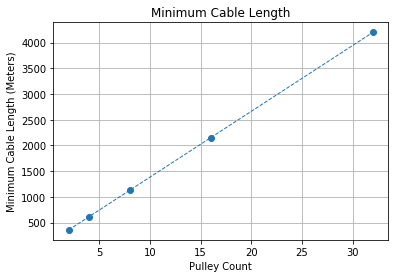

In [4]:
result=resultfull[0][1]

data=[]
for j in range(len(result)):
    Pulleys=int(result[j][1])
    minimum_cable_length=float(result[j][3])
    rec=(Pulleys, minimum_cable_length)
    data.append(rec)
data2 = np.array(data)
x, y = data2.T

labelstr='%0.3f kg' % dead_weight
plt.plot(x, y, linestyle='--', marker='o', linewidth=1.0)

titlestr='Minimum Cable Length'
plt.title(titlestr)
plt.ylabel('Minimum Cable Length (Meters)')
plt.xlabel('Pulley Count')
plt.grid()
plt.show()

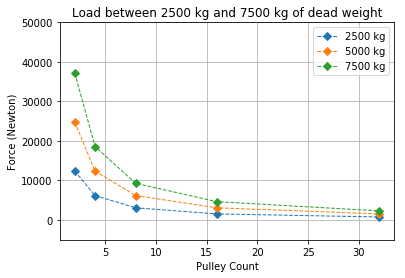

In [5]:
for i in range(len(resultfull)):
    dead_weight=resultfull[i][0]
    result=resultfull[i][1]
    
    data=[]
    for j in range(len(result)):
        Pulleys=int(result[j][1])
        Force_Needed=float(result[j][5])
        rec=(Pulleys, Force_Needed)
        data.append(rec)
    data2 = np.array(data)
    x, y = data2.T
    labelstr='%0.0f kg' % dead_weight
    plt.plot(x, y, linestyle='--', marker='D', linewidth=1.0, label=labelstr)

dw1=resultfull[0][0]
dw2=resultfull[len(resultfull)-1][0]
titlestr='Load between %0.0f kg and %0.0f kg of dead weight' % (dw1,dw2)
plt.title(titlestr)
plt.ylabel('Force (Newton)')
plt.xlabel('Pulley Count')
plt.legend(loc='upper right')
plt.ylim(-5000, 50000)
plt.grid()
plt.show()

## Done

In [ ]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))